In [26]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten,Dense,Conv2D,Dropout,MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [27]:
mnist=tf.keras.datasets.mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [28]:
print(xtrain.shape)

(60000, 28, 28)


In [29]:
input_shape=(28,28,1)

In [30]:
xtrain=xtrain.reshape(xtrain.shape[0],28,28,1)
xtest=xtest.reshape(xtest.shape[0],28,28,1)

In [31]:
print(xtrain.dtype)

uint8


In [32]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

In [33]:
print(xtrain.dtype)

float32


In [34]:
xtrain=xtrain/255
xtest=xtest/255

In [35]:
print(xtrain.shape)

(60000, 28, 28, 1)


In [36]:
print(xtest.shape)

(10000, 28, 28, 1)


In [37]:
model=Sequential([
    Conv2D(28,kernel_size=(3,3),input_shape=input_shape),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(200,activation="relu"),
    Dropout(0.3),
    Dense(10,activation="softmax")
])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4732)              0         
                                                                 
 dense_2 (Dense)             (None, 200)               946600    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2010      
                                                      

In [39]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 69s 36ms/step - loss: 0.1975 - accuracy: 0.9410
Epoch 2/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0797 - accuracy: 0.9752
Epoch 3/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0560 - accuracy: 0.9821
Epoch 4/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0461 - accuracy: 0.9855
Epoch 5/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0358 - accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0289 - accuracy: 0.9903
Epoch 7/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0254 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0229 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0211 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 59s 31m

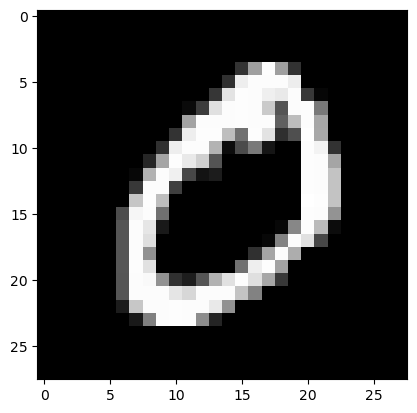

In [40]:
image=xtrain[1]
plt.imshow((image),cmap='gray')
plt.show()

In [41]:
image=image.reshape(1,input_shape[0],input_shape[1],input_shape[2])
predict_model=model.predict([image])
print("predicted class : {}".format(np.argmax(predict_model)))

1/1 [==============================] - 0s 86ms/step
predicted class : 0


In [42]:
test_loss,test_acc=model.evaluate(xtest,ytest)


313/313 [==============================] - 3s 9ms/step - loss: 0.0599 - accuracy: 0.9856
